## Binomial Distribution

In statistics, the binomial distribution is a discrete probability of independent events, where each event has exactly two possible outcomes. For example, if we toss a coin 10 times and we are interested in how many times it will land on heads, the probability of it lending one, two, three, up to 10 head in a row will form a distribution of probabilities or binomial distribution. When we’re interested in a specific outcome, let's say 3 heads out of 10 tosses, we call it binomial probability, which is a probability of exactly $k$ successes on $n$ repeated trials.

Following the characteristics of this distribution:

* the number of observations or trials is fixed;
* each observation or trial is independent. Like in the coin toss, the previous toss doesn’t affect the following;
* the probability of success is exactly the same from one trial to another. Each coin toss has 50\% chances to fall in heads or tails;

### Probability Mass Function

The probabilty mass function (PMF) is just the equivalent of the proability density function (PDF) in the discrete case. It describes the probability of an outcome, and for the binomial distribution is 

$$ \mathrm{PMF}_{\mathrm{binomial}} = \cfrac{n!}{k!(n-k)!}p^k (1-p)^{n-k}$$

where $n$ is the number of observations, $k$ the desired outcome, $p$ the probability of an outcome. To have a better understanding of how this formula works let's take a look at two examples.

#### A Fair Coin Flip
If we flip a fair coin 100 times, what is the probability of getting exactly 50 heads ? Now we might think that since we have equal chances of getting heads or tails, the answer would be 50\% probability. On the other hand, what are the odds that we will get 49 heads, or 51 ? Almost 50\% chance too, but what exactly ? Let’s first answer the first question and then try it for all the possible outcomes to see how our probabilities are distributed. So our parameters are the following: $n = 100$, $k = 50$, $p = 0.5$. Plugging numbers into the formula and we get

$$\mathbb{P}(50) = \cfrac{100!}{50!(100 - 50)!}0.5^{50}(1-0.5)^{(100-50)} \approx 8\% $$

So there is an 8\% chance of getting exactly 50 heads on 100 coin tosses. The chart below shows how to get this number in $\tt{python}$ and the binomial distribution for all possible outcomes.

In [7]:
from scipy.stats import binom # access binomial distribution

b = binom(100, 0.5) # params (n, p)

print ("P(50): {:.2f}%".format(b.pmf(50)*100))

P(50): 7.96%


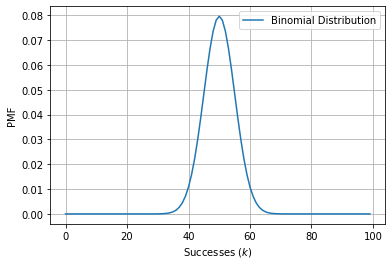

In [19]:
from matplotlib import pyplot as plt

x = range(0, 100)
plt.plot(x, b.pmf(x), label="Binomial Distribution")
plt.grid(True)
plt.legend()
plt.xlabel("Successes ($k$)")
plt.ylabel("PMF")
plt.show()



#### Success of Marketing Campaign

In 2014, 8.5\% of adults aged 18 years and older had diabetes.
Let’s go back to 2014 and pretend we’re working for the company that developed a drug for treating diabetes and our job is to make phone calls to find potential clients. The only statistic we know is that 8.5\% of adults in the US have diabetes. What is the probability that out of 50 calls at least 5 customers would have diabetes ?
Once again let’s plug numbers into the formula: $n = 50$, $k > 5$, $p = 0.085$

$$\sum_{k=5}^{n}\mathbb{P}(k) = \sum_{k=5}^{n}\Big(\cfrac{50!}{k!(50 - k)!}0.085^{k}(1-0.085)^{(50-k)}\Big) \approx 42.2\% $$

there is a 42.2\% chance that out of 50 calls we will find at least five customers with diabetes. Again in $\tt{python}$, this time instead of summing PMFs we exploit the binomial CDF

In [23]:
b = binom(50, 0.085) # params (n, p)

prob = b.cdf(50)-b.cdf(4)

print ("P(>=5): {:.1f}%".format(prob*100))

P(>=5): 42.2%


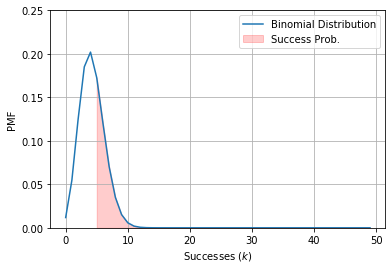

In [31]:
from matplotlib import pyplot as plt

x = range(0, 50)
x_fill = range(5, 50)
plt.plot(x, b.pmf(x), label="Binomial Distribution")
plt.fill_between(x_fill, 0, b.pmf(x_fill), color="red", alpha=0.2, label="Success Prob.")
plt.grid(True)
plt.legend()
plt.ylim(0, 0.25)
plt.xlabel("Successes ($k$)")
plt.ylabel("PMF")
plt.show()


Binomial distribution will be very useful when dealing with default probability and CDO pricing.